# CS4320 Introduction to Machine Learning

## A Template for the Course Project Submssion

Note: This template is optional. You can design your Jupyter Notebook structure based on your competition and preference. However, we expect you practice as many machine learning skills you learned in this course as possible.

**Please type your group name here:**

In [4]:
GroupName = "Narwhals"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)

## Submission instructions <a name="si"></a>
<hr>

- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Upload the .ipynb file to Canvas.
- **Submit the screenshot of your Kaggle submission ranking and score** 
- Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
- Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
- Make sure that the plots and output are rendered properly in your submitted file. 
- Please keep your notebook clean and delete any throwaway code.

## Introduction <a name="in"></a>

A few notes and tips when you work on this project: 

#### Tips
1. The project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 

Your answer here: In this problem we are given a dataset of tweets where we are predicting whether the tweet is about an actual disaster through three different parameters. Those parameters are the tweet itself, a possible keyword and a possible location. Not all the tweets had a keyword or location. A keyword would be something that could possibly make the tweet about a disaster (i.e. fire). The dataset is already split into train and test and therefore we will only be working with the train set. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import CountVectorizer



from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
file_train = r"/content/gdrive/My Drive/cs4320_project/data/train.csv"
file_test = r"/content/gdrive/My Drive/cs4320_project/data/test.csv"

train_df = pd.read_csv(file_train, header = 0, index_col="id")
test_df = pd.read_csv(file_test, header = 0, index_col="id")


<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

Data is already split for us from the Kaggle data set we are using. But we will 
split the x and y, into seperate Dataframes.

In [8]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_test = test_df

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 

###### Number of targets

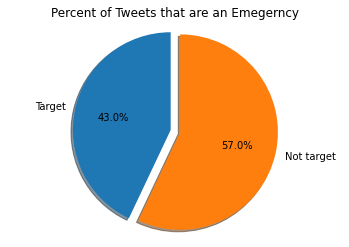

In [9]:
import matplotlib.pyplot as plt


target = y_train.sum()

not_target = len(y_train) - target


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Target', 'Not target'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie([target, not_target], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Percent of Tweets that are an Emegerncy")
plt.show()

The tweets in the set are pretty evenly split between actual emergencies and not emergencies. 

###### Number of words 

In [10]:

vec = CountVectorizer(strip_accents= 'ascii', stop_words='english')

X_counts = vec.fit_transform(X_train["text"])
bow_df = pd.DataFrame(
    X_counts.toarray(), columns=vec.get_feature_names_out(), index=X_train["text"]
)
bow_df.shape

(7613, 21616)

In [11]:
print("The number of rows and columns: ", *X_counts.shape)
print("The total number of elements: ", np.prod(X_counts.shape))
print("The number of non-zero elements: ", X_counts.nnz)
print(
    "Proportion of non-zero elements: %0.4f" % (X_counts.nnz / np.prod(X_counts.shape))
)

The number of rows and columns:  7613 21616
The total number of elements:  164562608
The number of non-zero elements:  73823
Proportion of non-zero elements: 0.0004


With this countvectorizer, there is very small proportion of non zero elements created using the count words vectorized. 

Best Score: 0.7192956429930152 Best Parameter: {'max_features': 10000}


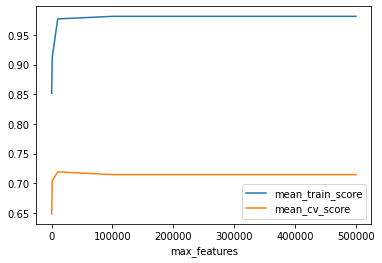

In [12]:
#optimization for max features in count vectorizer
best_score = 0

param_grid = {
    "max_features": [100, 1000, 10_000, 100_000, 500_000],
}

results_dict = {"max_features": [], "mean_cv_score": [], "mean_train_score": [],}


for max_features in param_grid["max_features"]:
    preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(strip_accents='ascii', max_features = max_features), 'text')])
    pipe = make_pipeline(
        preprocessor,
        LogisticRegression(max_iter=10000))
    scores = cross_validate(pipe, X_train, y_train, cv=2, return_train_score=True)  # perform cross-validation
    mean_score = np.mean(scores["test_score"])  # compute mean cross-validation accuracy
    if (
        mean_score > best_score
    ):  # if we got a better score, store the score and parameters
        best_score = mean_score
        best_parameters = {"max_features": max_features}
    results_dict["max_features"].append(max_features)
    results_dict["mean_cv_score"].append(mean_score)
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
print("Best Score:",best_score,"Best Parameter:",best_parameters)
results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("max_features")
results_df[["mean_train_score", "mean_cv_score"]].plot()

The initial observations shows us that within the CountVectorizer our max_features achieves its best score very quickly around about 10,000 and then doesn't improve after that showing us we only need to test up to 10,000 max_features. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.

We figured that having a feature for the length, how many words are found in each tweet could be helpful features. Maybe having a longer tweet might show that it could be tied to some disaster. The code below is, adding these features to the data set. Length is just how many total characters are in the tweet, word_count is the number of things seperated by a space.

In [13]:
X_train["length"] = 0
X_test["length"] = 0
X_train["word_count"] = 0
X_test["word_count"] = 0


for i in X_train.index:
    X_train["length"][i] = len(X_train["text"][i])
    X_train["word_count"][i] = len(X_train["text"][i].split(" "))

for i in X_test.index:
    X_test["length"][i] = len(X_test["text"][i])
    X_test["word_count"][i] = len(X_test["text"][i].split(" "))



<ipython-input-13-987d5f254dae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["length"][i] = len(X_train["text"][i])
<ipython-input-13-987d5f254dae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["word_count"][i] = len(X_train["text"][i].split(" "))
<ipython-input-13-987d5f254dae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["length"][i] = len(X_test["text"][i])
<ipython-input-13-987d5f254dae>:13: Setti

In [14]:
X_train

,keyword,location,text,length,word_count
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,69,13
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,38,7
5,NaN,NaN,All residents asked to 'shelter in place' are ...,133,22
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",65,9
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,88,17
...,...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,83,11
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,125,20
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,65,8


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 


In our data there are 3 different types of features we are going to use, numerical which will use a StandardScaler to transform the data, categorical which will use an OneHotEncoder, and text which will use a CountVectorizer. Our numerical features are length and word count. Our categorial features are keyword and location. 

In [15]:
preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(stop_words="english", strip_accents='ascii'), 'text'),
                                  ('length/word_count', StandardScaler(), ['length', 'word_count']),
                                  ])


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [16]:
# Your code here

dummy = DummyClassifier(strategy= "most_frequent")


some_results = cross_val_score(dummy, X_train, y_train, cv=5)
print(some_results)

[0.56992777 0.57058437 0.57058437 0.57030223 0.57030223]


The dummy regressor with strategery of "most frequent" saw accuracy of about .57 across the 5 cross validation folds

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [17]:
# Your code here


best_score = 0

param_grid = {
    "C": 10.0 ** np.arange(-1.5, 2, 0.5),
}

results_dict = {"C": [], "mean_cv_score": [], "standard dev": [] }


for C in param_grid["C"]:  # for each combination of parameters, train an SVC
    preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(stop_words="english",   strip_accents='ascii'), 'text')])
    pipe = make_pipeline(
        preprocessor,
        LogisticRegression(max_iter=10000, C=C),)
    
    scores = cross_val_score(pipe, X_train, y_train, cv=2)  # perform cross-validation
    mean_score = np.mean(scores)  # compute mean cross-validation accuracy
    if (
        mean_score > best_score
    ):  # if we got a better score, store the score and parameters
        best_score = mean_score
        best_parameters = {"C": C}
    results_dict["C"].append(C)
    results_dict["mean_cv_score"].append(mean_score)
    results_dict["standard dev"].append(scores.std())
print("The best score is ", best_score)
print("The best C value is ", best_parameters)

The best score is  0.7070808868968177
The best C value is  {'C': 0.31622776601683794}


In [18]:
df = pd.DataFrame.from_dict(results_dict)

df

,C,mean_cv_score,standard dev
0,0.031623,0.675689,0.016639
1,0.100000,0.696836,0.012307
2,0.316228,0.707081,0.006792
3,1.000000,0.705898,0.000433
4,3.162278,0.702745,0.001747
5,10.000000,0.696308,0.005557
6,31.622777,0.694338,0.006214


The best model with best score was C with value of 0.316.
However, the model with the small deviation was the C = 1. It is probably the best choice of C because it it has the smallest standard deviation, and it the mean cross validation score is only a little lower than the best one. We can see that all our average cv scores are around 70%.

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>

**Your tasks:**
1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [19]:

def try_model(model, cv_num = 5):
    preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(stop_words="english", strip_accents='ascii'), 'text'),
                                  ('length/word_count', StandardScaler(), ['length', 'word_count']),
                                  ])

    pipe = make_pipeline(preprocessor, model)
    cross_val_results = pd.DataFrame(
        cross_validate(pipe, X_train, y_train, cv =cv_num, return_train_score=True)
    )
    # return cross_val_results
    return "Average test score:", cross_val_results['test_score'].mean(), "Average train score:", cross_val_results['train_score'].mean(), "Average score time:", cross_val_results['score_time'].mean()
    


LGMB Classifier



In [20]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(max_depth=200)
table1 = try_model(model)

print(table1)


('Average test score:', 0.6742505411979088, 'Average train score:', 0.8476621487084636, 'Average score time:', 0.03832311630249023)


Ridge Classifier

In [21]:

model = RidgeClassifier()
table2 = try_model(model)

print(table2)

('Average test score:', 0.6357592689578888, 'Average train score:', 0.9978983555106608, 'Average score time:', 0.04566292762756348)


Random Forest

In [22]:
model = RandomForestClassifier()
table3 = try_model(model, 5)

print(table3)

('Average test score:', 0.6301176097042026, 'Average train score:', 0.9982595657163561, 'Average score time:', 0.14668164253234864)


SVC

In [23]:
model = SVC()
table4 = try_model(model, 5)

print(table4)

('Average test score:', 0.6871250548963204, 'Average train score:', 0.9464074239119388, 'Average score time:', 0.6815409660339355)


Decision Tree 

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 200)

table5 = try_model(model, 5)
print(table5)

('Average test score:', 0.6186855426603728, 'Average train score:', 0.9949100816057717, 'Average score time:', 0.028146934509277344)


Logistic Regressor


In [25]:
model = LogisticRegression(max_iter=10000 )

table6 = try_model(model, 5)
print(table6)

('Average test score:', 0.6674172543125427, 'Average train score:', 0.9766189583867447, 'Average score time:', 0.058579635620117185)


Almost all of our models got around the same train scores and same test scores. With hyperparameterization with our linear model none of our new models could beat it. Although, they were only a few decimals off. The fastest model was our decision tree but only by .05 of a second. We can see that there is about 0.3 between our test score and train score for each model showing that we are dealing with some over fitting. 

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it. 

We decided to use all of our features and the new features we created. We attempted to only use the tweets themselves to see if it would improve our model but it did not. In the end using all of our features in our pipeline gave us the best score. 

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

In [26]:
preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(stop_words="english", strip_accents='ascii'), 'text'),
                                  ('length/word_count', StandardScaler(), ['length', 'word_count']),
                                  ])

In [27]:
classifier = LogisticRegression(max_iter=10000,)


param_dist = {"logisticregression__C": 10.0 ** np.arange(-1.5, 2, 0.5),
              "columntransformer__text__max_features" : [100, 1000, 10_000, 100_000,200_000],
              }

pipe = make_pipeline(preprocessor, classifier)

search = GridSearchCV(
    pipe, param_dist, cv=4, n_jobs=-1, scoring = "roc_auc"
)

search.estimator.get_params().keys()

search.fit(X_train, y_train)

print("Best score", search.best_score_)
print("Best params", search.best_params_)

Best score 0.7524187081220887
Best params {'columntransformer__text__max_features': 100000, 'logisticregression__C': 0.1}


We can see that from our grid search to find the best parameters we found that the best score is given by a C= 0.1 , (but C=0.316 tests better). in the LogisticRegression and a max_features=10000 in the CountVectorizer. 

In [28]:
svc_classifier = SVC()

param_dist = {"svc__C":  10.0 ** np.arange(-1.5, 2, 0.5),
              "columntransformer__text__max_features" :  [10_000, 100_000, 50_000],
              }

pipe = make_pipeline(preprocessor, svc_classifier)

random_search = RandomizedSearchCV(
    pipe, param_dist, cv=4, n_jobs=-1, scoring = "roc_auc"
)

random_search.estimator.get_params().keys()

random_search.fit(X_train, y_train)

print("Best score", random_search.best_score_)
print("Best params", random_search.best_params_)

Best score 0.7569558085147121
Best params {'svc__C': 1.0, 'columntransformer__text__max_features': 10000}


In [29]:
preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(stop_words="english", strip_accents='ascii'), 'text'),
                                  ('length/word_count', StandardScaler(), ['length', 'word_count']),
                                  ])

LGBM_classifier = LGBMClassifier()


param_dist = {"columntransformer__text__max_features" : [1000, 10_000, 100_000],
              "lgbmclassifier__max_depth": [50, 100, 200, 500],
              "lgbmclassifier__learning_rate": [.1, .25, .5]
              }

pipe = make_pipeline(preprocessor, LGBM_classifier)

random_search = RandomizedSearchCV(
    pipe, param_dist, cv=4, n_jobs=-1, scoring = "roc_auc"
)

random_search.estimator.get_params().keys()

random_search.fit(X_train, y_train)

print("Best score", random_search.best_score_)
print("Best params", random_search.best_params_)

Best score 0.7159790473245486
Best params {'lgbmclassifier__max_depth': 200, 'lgbmclassifier__learning_rate': 0.1, 'columntransformer__text__max_features': 1000}


We tried to submit all of these to Kaggle and the best one was the Logistic Regeressor with a score of 0.80416.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>
<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [30]:
# Your code here


countVec = CountVectorizer(stop_words="english", strip_accents='ascii')

X_counts = countVec.fit_transform(X_train["text"])
bow_df = pd.DataFrame(
    X_counts.toarray(), columns=countVec.get_feature_names_out(), index=X_train["text"]
)


In [31]:
x = bow_df.max().sort_values(ascending=False)

for i in range(15):
  print(x.iloc[i], x.index[i])


13 wreck
9 gt
4 bus
4 clev
4 lt
4 issues
4 ha
4 check
4 bestnaijamade
4 hey
4 fucking
4 http
4 built
4 6aug
3 save


In [32]:
preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(stop_words="english", strip_accents='ascii', max_features = 100000), 'text'),
                                  ('length/word_count', StandardScaler(), ['length', 'word_count']),
                                  ])

classifier = LogisticRegression(max_iter=10000,C = 0.316228)

pipe = make_pipeline(preprocessor, classifier)

pipe.fit(X_train, y_train) # train a logistic regression classifier on the entire training set


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('keyword/location',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['keyword', 'location']),
                                                 ('text',
                                                  CountVectorizer(max_features=100000,
                                                                  stop_words='english',
                                                                  strip_accents='ascii'),
                                                  'text'),
                                                 ('length/word_count',
                                                  StandardScaler(),
                                                  ['length', 'word_count'])])),
                ('logisticregression',
                 LogisticRegression(C=0.316228, max_iter=10000))])

In [33]:
emergency = pipe.predict_proba(X_train)

tweet_index = 0
tweet_chance = 0

for t in range(len(emergency)):
    if emergency[t][1] > tweet_chance:
        tweet_index = t
        tweet_chance = emergency[t][1]


print(X_train.iloc[tweet_index])
print(X_train.iloc[tweet_index]['text'])

print(tweet_chance)

keyword                                                 bombing
location                                                 London
text          Japan marks 70th anniversary of Hiroshima atom...
length                                                      140
word_count                                                   19
Name: 1669, dtype: object
Japan marks 70th anniversary of Hiroshima atomic bombing: Bells tolled in Hiroshima on Thursday as Japan marked 70Û_ http://t.co/NBZiKcJpHp
0.9994370148050067


We went through and found the most important keyword, location, text, length and word count. We found that our most important keyword is bombing, location is London and our most important text was about the bombing of Hiroshima which was a target in our test set. 


Additionally, the tweet that was least likely to be an actual disaster was pure giberish. 


Note we didn't use Shap or anything like it because the only thing really mattered was the text of tweet. Nothing else was going to tell us anything. 

Adding in other features never really added to the model. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

In [34]:
preprocessor = ColumnTransformer([('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location']), 
                                  ('text', CountVectorizer(stop_words="english",   strip_accents='ascii'), 'text')])
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=10000, C=0.316),)
    
scores = cross_val_score(pipe, X_train, y_train, cv=2) 

print(scores)

[0.70028894 0.71387283]


We were given our train and test already split therefore we will show our test scores from our best model using the split we made for x and y from the train set. We got around a 70% test score. Our train scores were almost 100% which shows us there is some over fitting going on. We did not have a lot of issues with optimization bias but rather that data was very messy and needed to be cleaned. Both our scores show that we got 70% of our test set correct which is about 20% better than our dummy test. 


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>
<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.

Example of us doing it in code

In [35]:
'''
C = 0.316
feature = 10000                     
pipe = make_pipeline(
            ColumnTransformer([('text', CountVectorizer(stop_words="english", strip_accents='ascii', max_features = feature), 'text')
            ,('keyword/location', OneHotEncoder(handle_unknown='ignore'),['keyword', 'location'])]),
            LogisticRegression(max_iter=1000, C=C))


pipe.fit( X_train, y_train)
prediction = pipe.predict(X_test)

ids = X_test.index.values

out = [ids, prediction]
outT = np.transpose(out)

out_df = pd.DataFrame(outT, columns=['id','target'])

#save results to csv file
file_path = "/content/gdrive/My Drive/cs4320_project/results_latest2.csv"
out_df.to_csv(file_path, index=False)

'''

'\nC = 0.316\nfeature = 10000                     \npipe = make_pipeline(\n            ColumnTransformer([(\'text\', CountVectorizer(stop_words="english", strip_accents=\'ascii\', max_features = feature), \'text\')\n            ,(\'keyword/location\', OneHotEncoder(handle_unknown=\'ignore\'),[\'keyword\', \'location\'])]),\n            LogisticRegression(max_iter=1000, C=C))\n\n\npipe.fit( X_train, y_train)\nprediction = pipe.predict(X_test)\n\nids = X_test.index.values\n\nout = [ids, prediction]\noutT = np.transpose(out)\n\nout_df = pd.DataFrame(outT, columns=[\'id\',\'target\'])\n\n#save results to csv file\nfile_path = "/content/gdrive/My Drive/cs4320_project/results_latest2.csv"\nout_df.to_csv(file_path, index=False)\n\n'

Below are some of our many Kaggle results. 
Our best Kaggle results were from Logistic with a C-value of 0.317

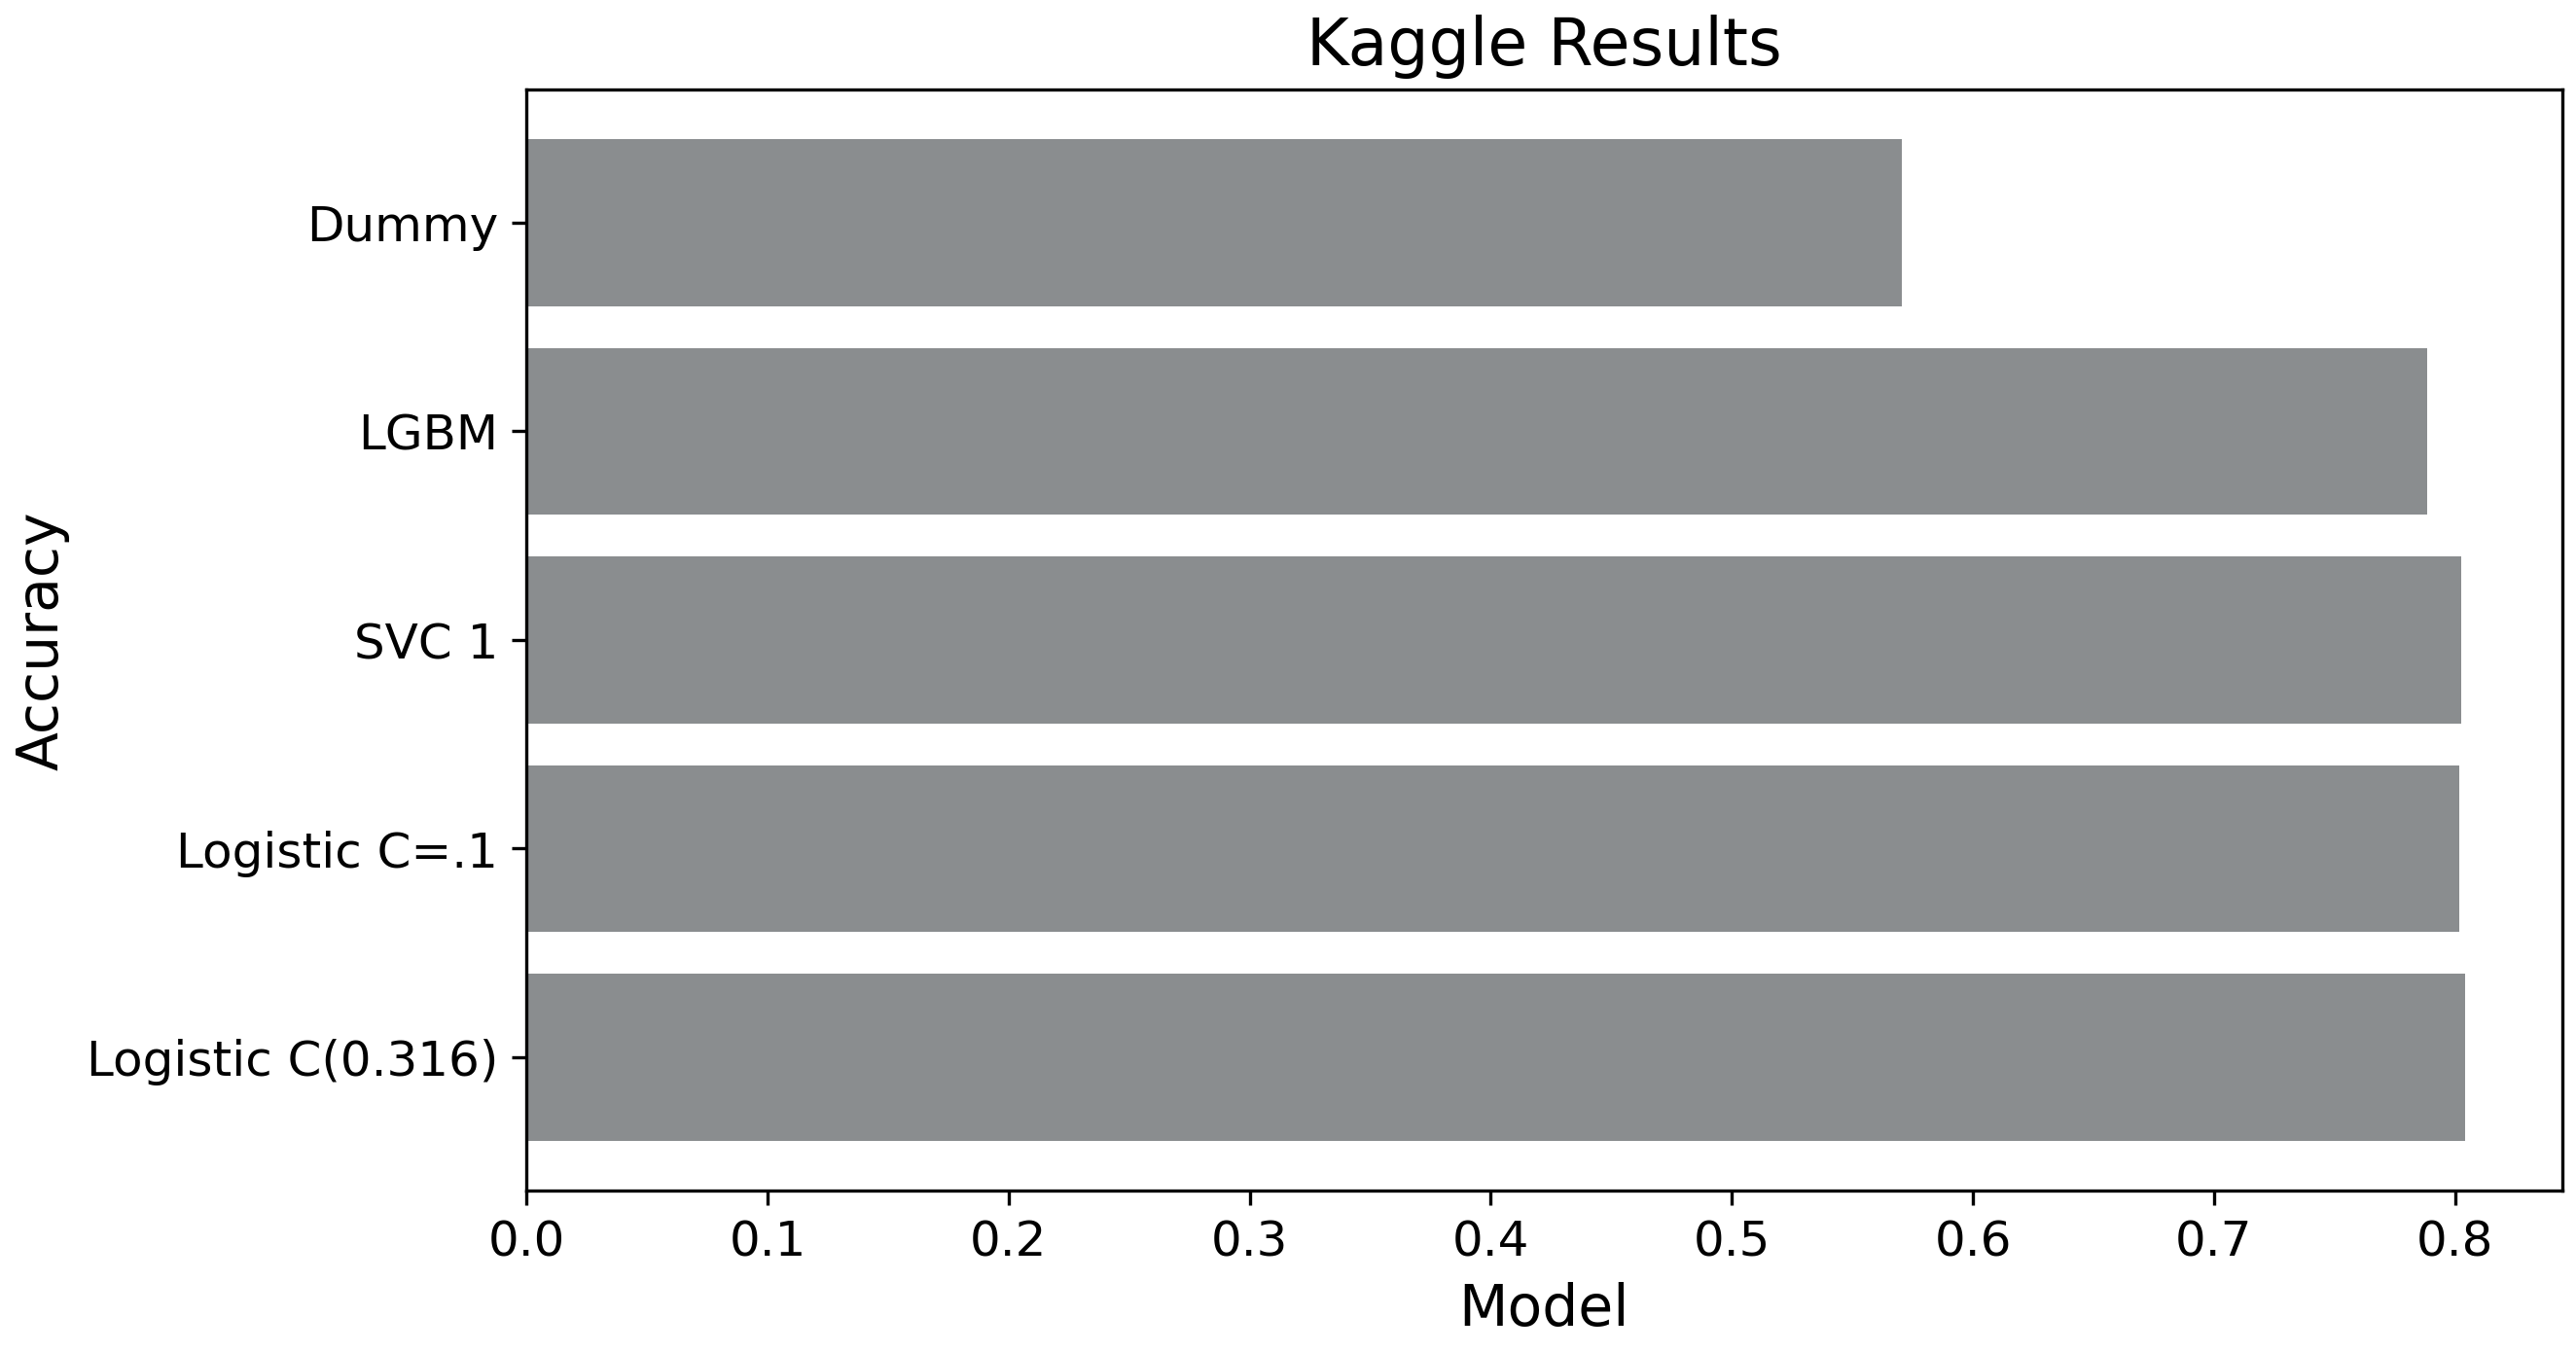_





<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>
<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

Our  biggest takeaway from the supervised machine learning material we have learned so far is that with almost any data set there is a large amount of different ways to work with the data. Just with this dataset alone we tried more than 6 models that got very similar results. It also shows that if one model doesn't work there will almost always be another model to try. Our biggest problem in our data is that the data needed to be cleaned. Looking into the tweets we found a tweet that was in our data twice and in the test set it was counted once as a target and once as not a target. Therefore, in order to improve our performance we would need to find a way to clean the data given to us. We beleive that was our biggest set back because we tried a large amount of models with hyperparameterization and still got about the same score on each one. 

<!-- END QUESTION -->

<br><br>